<a href="https://colab.research.google.com/github/PrabhakaranD/used-car-price-prediction/blob/main/Used_car_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"get2jawa","key":"f5b57fa5433bcfdaf1fbe8d3222d5907"}'}

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

!chmod 600 ~/.kaggle/kaggle.json

In [3]:
import kaggle

In [4]:
!kaggle datasets download -d avikasliwal/used-cars-price-prediction

  0% 0.00/172k [00:00<?, ?B/s]
100% 172k/172k [00:00<00:00, 50.5MB/s]


In [5]:
! mkdir train

In [6]:
! unzip used-cars-price-prediction.zip -d train

Archive:  used-cars-price-prediction.zip
  inflating: train/test-data.csv     
  inflating: train/train-data.csv    


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [99]:
df = pd.read_csv('/content/train/train-data.csv')

In [100]:
df.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [101]:
import seaborn as sns
import missingno as msno

In [161]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [237]:
X = df

In [238]:
X.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


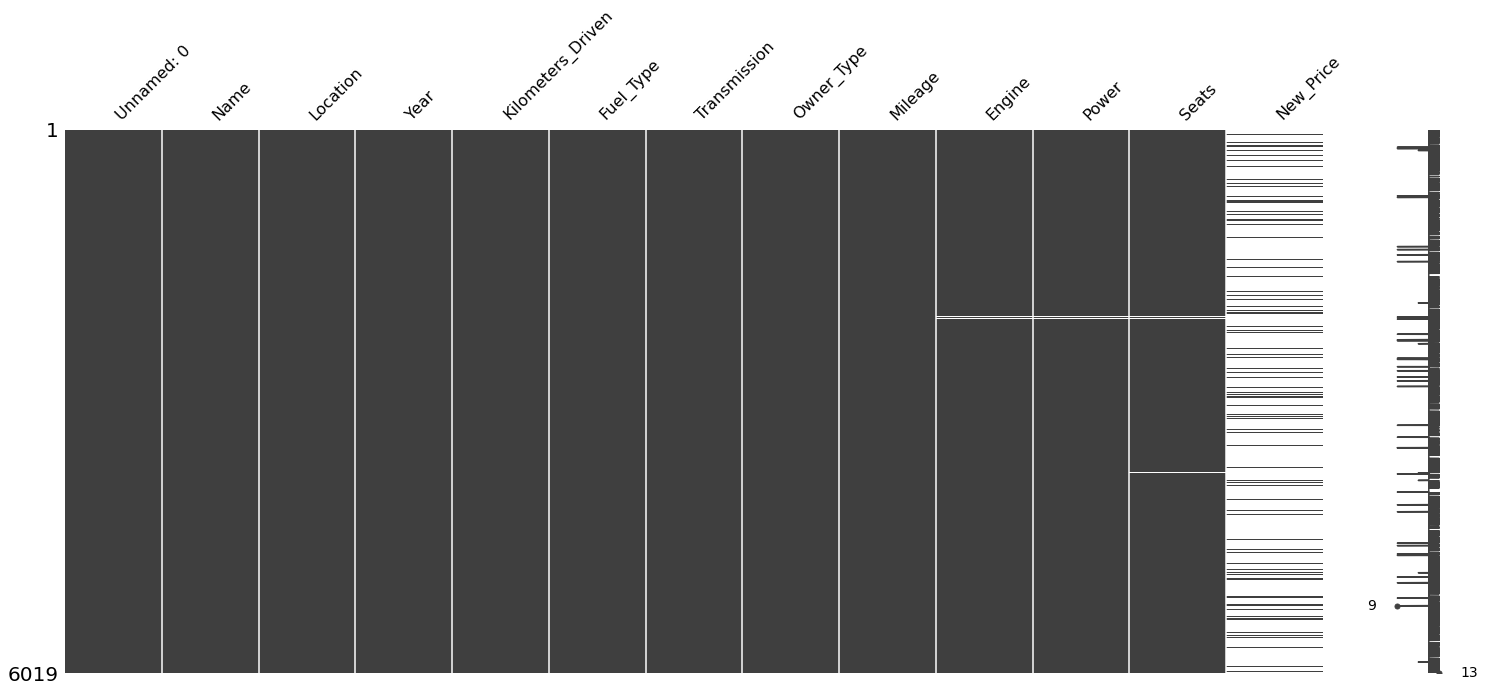

In [163]:
msno.matrix(X)

In [239]:
X = X[X['Mileage'].notna() == True]
X = X[X['Engine'].notna() == True]
X = X[X['Power'].notna() == True]
X = X[X['Seats'].notna() == True]

In [240]:
X = X.drop('New_Price', 1)

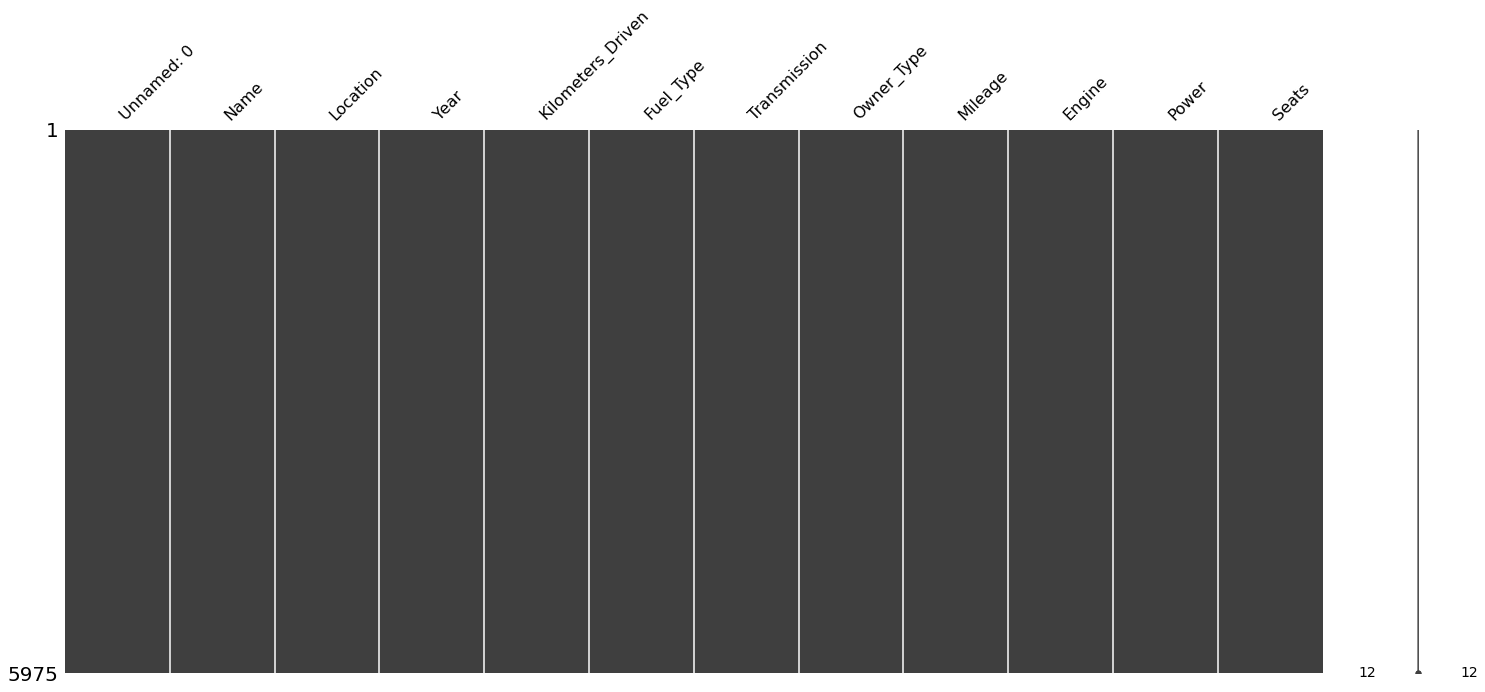

In [166]:
msno.matrix(X)

In [241]:
X.isnull().sum()

Unnamed: 0           0
Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
dtype: int64

In [242]:
X_backup = X

In [243]:
X

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.4 kmpl,1248 CC,74 bhp,5.0,4.75
6015,6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.4 kmpl,1120 CC,71 bhp,5.0,4.00
6016,6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.0 kmpl,2498 CC,112 bhp,8.0,2.90
6017,6017,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.9 kmpl,998 CC,67.1 bhp,5.0,2.65


In [244]:
X['Mileage'] = X['Mileage'].str.extract(r'(\d+.\d+)').astype('float')

In [245]:
X['Engine'] = X['Engine'].str.extract(r'(\d+)').astype('int')

In [246]:
X.isnull().sum()

Unnamed: 0           0
Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
dtype: int64

In [247]:
X.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998,58.16 bhp,5.0,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582,126.2 bhp,5.0,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199,88.7 bhp,5.0,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248,88.76 bhp,7.0,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968,140.8 bhp,5.0,17.74


In [248]:
X['Power'] = X['Power'].apply(lambda x:x.split(' ')[0])

In [249]:
X.isnull().sum()

Unnamed: 0           0
Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
dtype: int64

In [250]:
X.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998,58.16,5.0,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582,126.2,5.0,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199,88.7,5.0,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248,88.76,7.0,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968,140.8,5.0,17.74


In [251]:
X['Company'] = X['Name'].apply(lambda x:x.split(' ')[0])

In [252]:
X['Company'].unique()

array(['Maruti', 'Hyundai', 'Honda', 'Audi', 'Nissan', 'Toyota',
       'Volkswagen', 'Tata', 'Land', 'Mitsubishi', 'Renault',
       'Mercedes-Benz', 'BMW', 'Mahindra', 'Ford', 'Porsche', 'Datsun',
       'Jaguar', 'Volvo', 'Chevrolet', 'Skoda', 'Mini', 'Fiat', 'Jeep',
       'Smart', 'Ambassador', 'Isuzu', 'ISUZU', 'Force', 'Bentley',
       'Lamborghini'], dtype=object)

In [253]:
company_map = X['Company'].value_counts().to_dict()

In [254]:
X['Company'] = X['Company'].map(company_map)

In [255]:
X.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Company
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998,58.16,5.0,1.75,1197
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582,126.2,5.0,12.50,1100
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199,88.7,5.0,4.50,601
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248,88.76,7.0,6.00,1197
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968,140.8,5.0,17.74,236


In [256]:
X.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Company
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998,58.16,5.0,1.75,1197
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582,126.2,5.0,12.50,1100
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199,88.7,5.0,4.50,601
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248,88.76,7.0,6.00,1197
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968,140.8,5.0,17.74,236


In [257]:
owner_type_map = X['Owner_Type'].value_counts().to_dict()

In [258]:
X['Owner_Type'] = X['Owner_Type'].map(owner_type_map)

In [259]:
X.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Company
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,4903,26.60,998,58.16,5.0,1.75,1197
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,4903,19.67,1582,126.2,5.0,12.50,1100
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,4903,18.20,1199,88.7,5.0,4.50,601
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,4903,20.77,1248,88.76,7.0,6.00,1197
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,953,15.20,1968,140.8,5.0,17.74,236


In [260]:
X_backup = X

In [261]:
X['Transmission'] = X['Transmission'].map({'Manual': 0, 'Automatic':1})

In [262]:
X.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Company
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,0,4903,26.60,998,58.16,5.0,1.75,1197
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,0,4903,19.67,1582,126.2,5.0,12.50,1100
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,0,4903,18.20,1199,88.7,5.0,4.50,601
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,0,4903,20.77,1248,88.76,7.0,6.00,1197
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,1,953,15.20,1968,140.8,5.0,17.74,236


In [263]:
X['Fuel_Type'] = X['Fuel_Type'].map(X['Fuel_Type'].value_counts().to_dict())

In [265]:
X.drop('Name',axis=1, inplace=True)

In [266]:
X['Location'] = X['Location'].map(X['Location'].value_counts().to_dict())

In [267]:
X.head()

,Unnamed: 0,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Company
0,0,784,2010,72000,56,0,4903,26.60,998,58.16,5.0,1.75,1197
1,1,613,2015,41000,3195,0,4903,19.67,1582,126.2,5.0,12.50,1100
2,2,490,2011,46000,2714,0,4903,18.20,1199,88.7,5.0,4.50,601
3,3,490,2012,87000,3195,0,4903,20.77,1248,88.76,7.0,6.00,1197
4,4,634,2013,40670,3195,1,953,15.20,1968,140.8,5.0,17.74,236


In [230]:
X.head()

,Unnamed: 0,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Company
0,0,784,2010,72000,56,0,4903,26.60,998,58.16,5.0,1197
1,1,613,2015,41000,3195,0,4903,19.67,1582,126.2,5.0,1100
2,2,490,2011,46000,2714,0,4903,18.20,1199,88.7,5.0,601
3,3,490,2012,87000,3195,0,4903,20.77,1248,88.76,7.0,1197
4,4,634,2013,40670,3195,1,953,15.20,1968,140.8,5.0,236


In [268]:
X.corr()

,Unnamed: 0,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Seats,Price,Company
Unnamed: 0,1.000000,0.004152,0.002530,-0.008615,-0.007600,-0.016742,0.000936,0.020521,-0.003843,-0.010723,-0.019859,0.006503
Location,0.004152,1.000000,0.083130,-0.039334,-0.064930,0.064490,0.113545,-0.028790,0.019196,-0.000928,0.043948,-0.032637
Year,0.002530,0.083130,1.000000,-0.172663,0.072261,0.095812,0.378646,0.314417,-0.052538,0.012338,0.305800,0.020560
Kilometers_Driven,-0.008615,-0.039334,-0.172663,1.000000,0.067061,-0.025870,-0.080288,-0.064991,0.090832,0.083101,-0.011263,-0.050717
Fuel_Type,-0.007600,-0.064930,0.072261,0.067061,1.000000,0.133599,0.027830,-0.038480,0.332960,0.214370,0.239298,-0.295100
Transmission,-0.016742,0.064490,0.095812,-0.025870,0.133599,1.000000,0.002425,-0.342504,0.501056,-0.075325,0.586075,-0.339673
Owner_Type,0.000936,0.113545,0.378646,-0.080288,0.027830,0.002425,1.000000,0.153845,-0.051187,-0.005605,0.093407,0.048788
Mileage,0.020521,-0.028790,0.314417,-0.064991,-0.038480,-0.342504,0.153845,1.000000,-0.598638,-0.308226,-0.313877,0.368380
Engine,-0.003843,0.019196,-0.052538,0.090832,0.332960,0.501056,-0.051187,-0.598638,1.000000,0.393435,0.659117,-0.528936
Seats,-0.010723,-0.000928,0.012338,0.083101,0.214370,-0.075325,-0.005605,-0.308226,0.393435,1.000000,0.052262,-0.153712


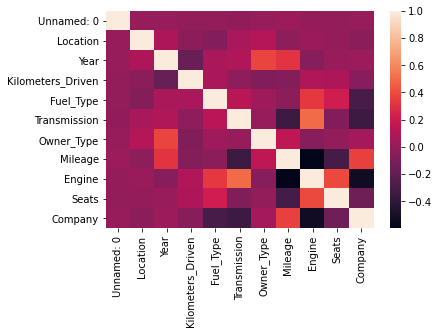

In [232]:
sns.heatmap(X.corr())

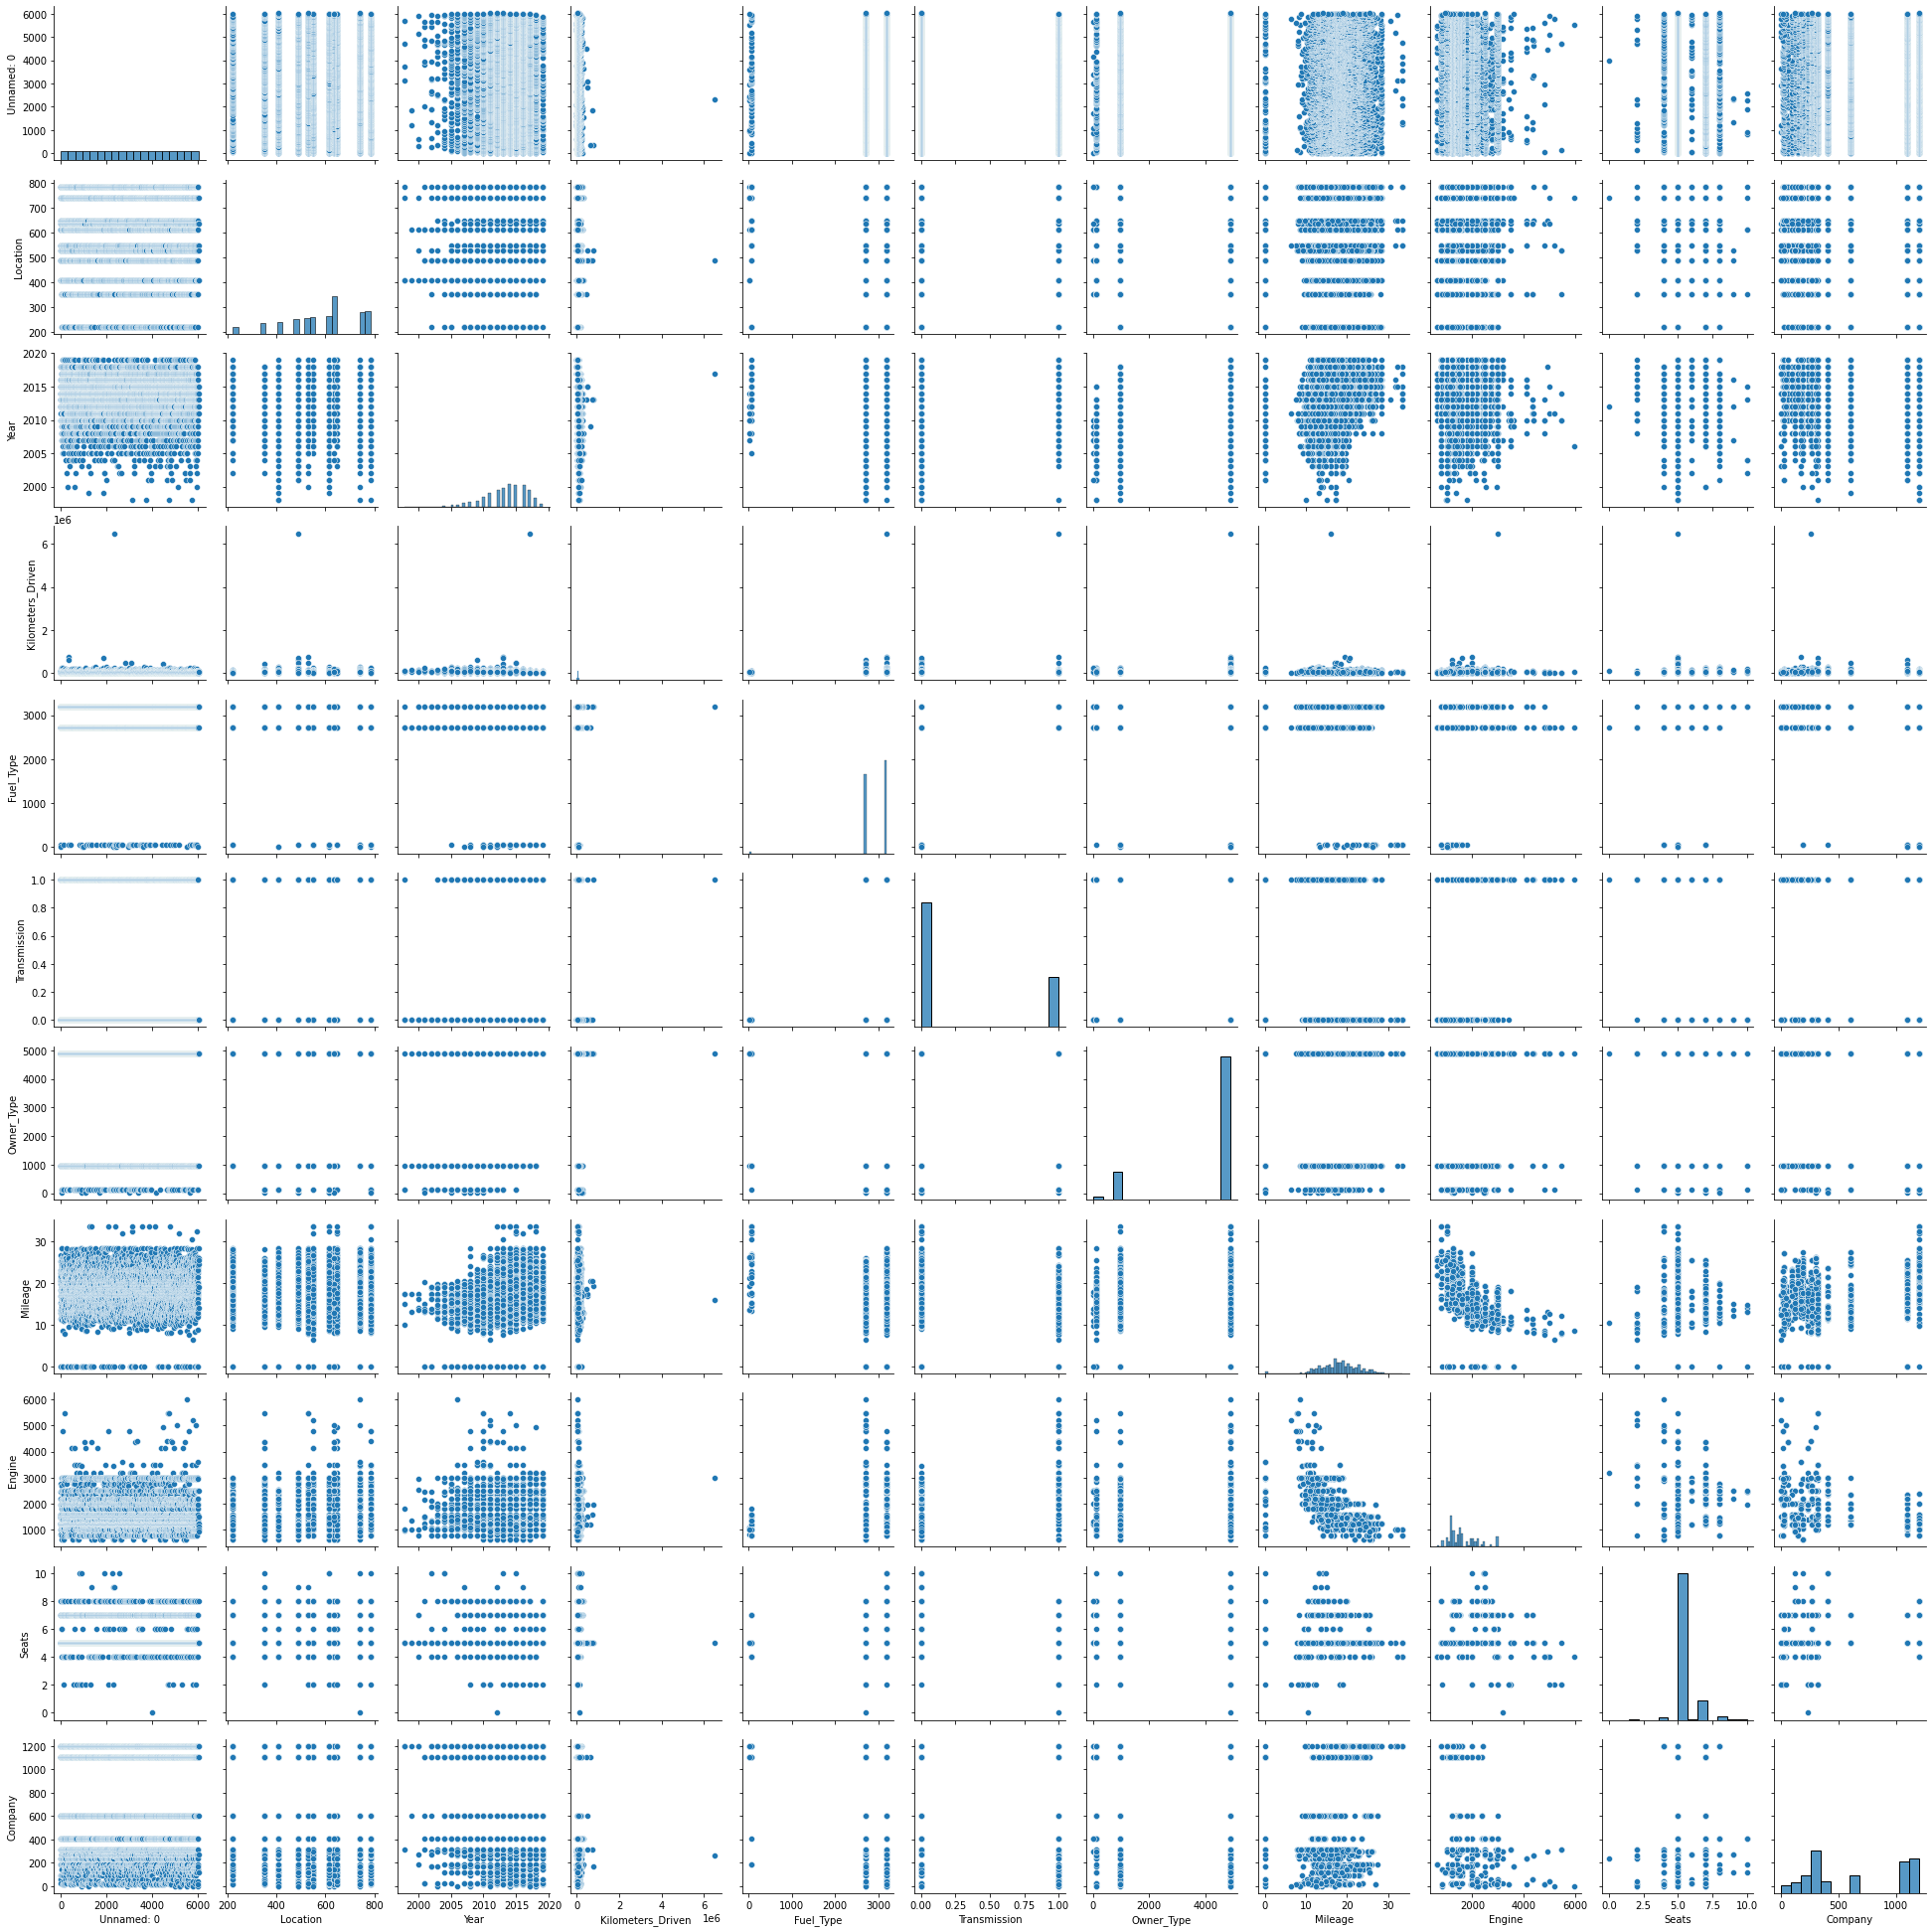

In [233]:
sns.pairplot(X)

In [269]:
from sklearn.linear_model import LinearRegression

In [270]:
lr = LinearRegression()

In [273]:
X.columns

Index(['Unnamed: 0', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats',
       'Price', 'Company'],
      dtype='object')

In [274]:
X.drop('Unnamed: 0', axis=1, inplace=True)

In [275]:
y = X['Price']

In [277]:
X.drop('Price', axis=1, inplace=True)

In [282]:
X['Power'].astype(float)

ValueError: ignored

In [283]:
X.isnull().sum()

Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Company              0
dtype: int64

In [284]:
X.dtypes

Location               int64
Year                   int64
Kilometers_Driven      int64
Fuel_Type              int64
Transmission           int64
Owner_Type             int64
Mileage              float64
Engine                 int64
Power                 object
Seats                float64
Company                int64
dtype: object

In [289]:
X['Power']

0       58.16
1       126.2
2        88.7
3       88.76
4       140.8
        ...  
6014       74
6015       71
6016      112
6017     67.1
6018     57.6
Name: Power, Length: 5975, dtype: object

In [290]:
X['Power'] = pd.to_numeric(X['Power'], downcast='float')

ValueError: ignored

In [296]:
X['Power'] = X['Power'].apply(lambda x: 0 if x == 'null' else x)

In [301]:
X['Power'] = X['Power'].apply(lambda x: 200 if x == 0 else x)

In [302]:
X['Power'].astype('float')

0        58.16
1       126.20
2        88.70
3        88.76
4       140.80
         ...  
6014     74.00
6015     71.00
6016    112.00
6017     67.10
6018     57.60
Name: Power, Length: 5975, dtype: float64

In [303]:
lr.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [304]:
test_data = pd.read_csv('/content/train/test-data.csv')

In [305]:
test_data.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price
0,0,Maruti Alto K10 LXI CNG,Delhi,2014,40929,CNG,Manual,First,32.26 km/kg,998 CC,58.2 bhp,4.0,NaN
1,1,Maruti Alto 800 2016-2019 LXI,Coimbatore,2013,54493,Petrol,Manual,Second,24.7 kmpl,796 CC,47.3 bhp,5.0,NaN
2,2,Toyota Innova Crysta Touring Sport 2.4 MT,Mumbai,2017,34000,Diesel,Manual,First,13.68 kmpl,2393 CC,147.8 bhp,7.0,25.27 Lakh
3,3,Toyota Etios Liva GD,Hyderabad,2012,139000,Diesel,Manual,First,23.59 kmpl,1364 CC,null bhp,5.0,NaN
4,4,Hyundai i20 Magna,Mumbai,2014,29000,Petrol,Manual,First,18.5 kmpl,1197 CC,82.85 bhp,5.0,NaN
